# Bagian 1 : Data Cleaning

Perkenalkan saya Kresna Dwipayana S H. Pada proyek ini saya ingin membuat sebuah perkiraan atau Forecasting mengenai perkiraan jumlah kasus positif covid 19, khususnya di Indonesia. Hal ini menjadi motivasi mengingat pada juli 2021 lalu, indonesia mengalami lonjakan kasus covid 19 tipe delta yang memakan banyak korban, yang mana umumnya tingkat kematian yang tinggi salah satunya akibat tingkat kasus positif yang tinggi namun tidak diantisipasi dengan tingkat ketersediaan kasur rumah sakit yang memadai. Sekiranya proyek ini dapat menjadi antisipasi mengenai kasus positif yang akan terjadi kedepannya. 

Data covid yang saya teliti yakni data covid dunia yang mana saya unduh dari website **ourworldindata.org** per tanggal **29 Januari 2022**. Saya akan membuat perkiraan angka kasus positif covid 19 untuk 6 bulan ke depan (hingga bulan juli 2022). Pada notebook ini fokus saya ingin melihat kondisi data, dan melakukan beberapa optimasi yang diperlukan.



### Importing Library

In [1]:
# Untuk Mengolah Dataset
import pandas as pd

# Untuk Visualisasi
import seaborn as sns
import matplotlib.pylab as plt

### Importing Dataset

In [2]:
df = pd.read_csv('owid-covid-data.csv')
pd.set_option('display.max_column',df.shape[0]+1)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157931,ZWE,Africa,Zimbabwe,2022-01-24,228541.0,287.0,297.286,5305.0,11.0,6.714,15143.017,19.016,19.698,351.507,0.729,0.445,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4913.0,1829333.0,121.211,0.326,4043.0,0.268,0.0735,13.6,tests performed,7517985.0,4245063.0,3272922.0,NaN,5082.0,10273.0,49.81,28.13,21.69,NaN,681.0,5009.0,0.033,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157932,ZWE,Africa,Zimbabwe,2022-01-25,228776.0,235.0,330.857,5316.0,11.0,8.286,15158.588,15.571,21.922,352.236,0.729,0.549,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.0,1832426.0,121.416,0.205,3799.0,0.252,0.0871,11.5,tests performed,7525574.0,4248576.0,3276998.0,NaN,7589.0,95

### EDA

In [3]:
# Melihat Bentuk Data 
df.shape

(157936, 67)

In [4]:
# Melihat kolom yang ada pada dataset
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157936 entries, 0 to 157935
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    157936 non-null  object 
 1   continent                                   148448 non-null  object 
 2   location                                    157936 non-null  object 
 3   date                                        157936 non-null  object 
 4   total_cases                                 155082 non-null  float64
 5   new_cases                                   155043 non-null  float64
 6   new_cases_smoothed                          153892 non-null  float64
 7   total_deaths                                137593 non-null  float64
 8   new_deaths                                  137763 non-null  float64
 9   new_deaths_smoothed                         137633 non-null  float64
 

Seluruh format data pada setiap kolom sudah sesuai, namun saya akan mengubah "date" menjadi tipe datetime untuk memudahkan visualisasi.

In [6]:
# Mendeteksi data duplikat
print('Total Data Duplikat :')
for item in df :
     print ('•', item ,'=', df.duplicated().sum())

Total Data Duplikat :
• iso_code = 0
• continent = 0
• location = 0
• date = 0
• total_cases = 0
• new_cases = 0
• new_cases_smoothed = 0
• total_deaths = 0
• new_deaths = 0
• new_deaths_smoothed = 0
• total_cases_per_million = 0
• new_cases_per_million = 0
• new_cases_smoothed_per_million = 0
• total_deaths_per_million = 0
• new_deaths_per_million = 0
• new_deaths_smoothed_per_million = 0
• reproduction_rate = 0
• icu_patients = 0
• icu_patients_per_million = 0
• hosp_patients = 0
• hosp_patients_per_million = 0
• weekly_icu_admissions = 0
• weekly_icu_admissions_per_million = 0
• weekly_hosp_admissions = 0
• weekly_hosp_admissions_per_million = 0
• new_tests = 0
• total_tests = 0
• total_tests_per_thousand = 0
• new_tests_per_thousand = 0
• new_tests_smoothed = 0
• new_tests_smoothed_per_thousand = 0
• positive_rate = 0
• tests_per_case = 0
• tests_units = 0
• total_vaccinations = 0
• people_vaccinated = 0
• people_fully_vaccinated = 0
• total_boosters = 0
• new_vaccinations = 0
• ne

Tidak ditemukan data duplikat pada seluruh kolom pada dataset ini

In [7]:
# Mendeteksi Data Kosong
print ('Total Data Kosong :')
for item in df :
     print ('•', item + '=', (df[item].isnull().sum()))

Total Data Kosong :
• iso_code= 0
• continent= 9488
• location= 0
• date= 0
• total_cases= 2854
• new_cases= 2893
• new_cases_smoothed= 4044
• total_deaths= 20343
• new_deaths= 20173
• new_deaths_smoothed= 20303
• total_cases_per_million= 3576
• new_cases_per_million= 3615
• new_cases_smoothed_per_million= 4761
• total_deaths_per_million= 21052
• new_deaths_per_million= 20882
• new_deaths_smoothed_per_million= 21012
• reproduction_rate= 38709
• icu_patients= 135962
• icu_patients_per_million= 135962
• hosp_patients= 135241
• hosp_patients_per_million= 135241
• weekly_icu_admissions= 152884
• weekly_icu_admissions_per_million= 152884
• weekly_hosp_admissions= 147697
• weekly_hosp_admissions_per_million= 147697
• new_tests= 93100
• total_tests= 92028
• total_tests_per_thousand= 92028
• new_tests_per_thousand= 93100
• new_tests_smoothed= 77955
• new_tests_smoothed_per_thousand= 78676
• positive_rate= 82663
• tests_per_case= 83413
• tests_units= 76482
• total_vaccinations= 116172
• people_

Terdapat banyak data kosong dalam dataset ini. Jika di lihat, data kosong ini dapat di toleransi, karena dataset ini merupakan rekap harian yang mana mungkin pada hari itu tidak terdapat kasus baru dan sebagainya, sehingga dapat diatasi hanya dengan mengisi angka 0, cukup hanya dilakukan pada kolom yang akan digunakan dalam pemodelan.

<AxesSubplot:xlabel='new_cases_smoothed'>

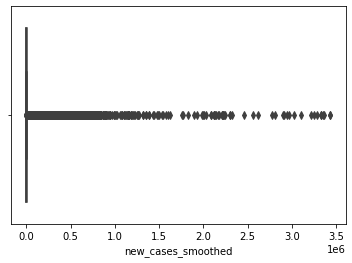

In [8]:
# Melihat Distribusi Data Variabel Target
sns.boxplot(x='new_cases_smoothed',data = df)

Data covid 19 pasti akan sangat dinamis mengingat persebaran virus, angka positif yang terus berubah setiap waktu, sehingga akan banyak terdapat data ekstrim atau outlier pada dataset ini.

Selanjutnya kita akan melakukan optimasi berdasarkan hasil eksplorasi sebelumnya.

### Data Cleaning

In [3]:
covid = df.copy()

In [4]:
# Mengubah Tipe Data dan Membuat Kolom Baru
covid['date'] = pd.to_datetime(covid['date'])

In [5]:
# Untuk Memudahkan Manipulasi Data
covid['year'] = pd.DatetimeIndex(covid['date']).year
covid['year'] = covid['year'].astype(str)

# Mengambil Data 1 Tahun Sebelumnya, Karena Lebih Akurat Untuk Prediksi Jangka Pendek
covid.drop(covid[covid['year'] == '2020'].index, inplace= True)

In [6]:
# Mengisi Data Kosong
covid['new_cases_smoothed'].fillna(0,inplace = True)

print('Total Data Kosong Variabel Target =',covid['new_cases_smoothed'].isnull().sum())

Total Data Kosong Variabel Target = 0


In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91115 entries, 312 to 157935
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    91115 non-null  object        
 1   continent                                   86006 non-null  object        
 2   location                                    91115 non-null  object        
 3   date                                        91115 non-null  datetime64[ns]
 4   total_cases                                 88773 non-null  float64       
 5   new_cases                                   88737 non-null  float64       
 6   new_cases_smoothed                          91115 non-null  float64       
 7   total_deaths                                82711 non-null  float64       
 8   new_deaths                                  82683 non-null  float64       
 9   new

### Export Clean Dataset

In [8]:
covid.to_csv("Covid19_2022.csv",index=False)